In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
files.upload()

Saving CustomerSegmentation.xlsx to CustomerSegmentation.xlsx


{'CustomerSegmentation.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xf5m\xbce\x92\x01\x00\x00\x99\x06\x00\x00\x13\x00\xd7\x01[Content_Types].xml \xa2\xd3\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [4]:
df = pd.read_excel('CustomerSegmentation.xlsx')
print(df)

    Income  Average_purchases  Last_year_purchases
0      7.8               1.59                    5
1      1.1               0.63                    1
2      7.2               1.03                    6
3      8.0               1.43                    5
4      1.0               0.35                    2
5      1.5               0.66                    2
6      9.1               1.96                    5
7      0.6               0.41                    1
8      0.8               0.60                    2
9      8.0               1.54                    9
10     5.6               1.72                    8
11     6.7               1.37                    6
12     6.1               0.70                    4
13     6.4               0.71                    4
14     5.7               1.64                    8
15     6.0               0.73                    4
16     0.6               0.37                    2
17     1.3               0.55                    1
18     8.4               1.99  

In [5]:
df.dtypes
df.isnull().sum()

Income                 0
Average_purchases      0
Last_year_purchases    0
dtype: int64

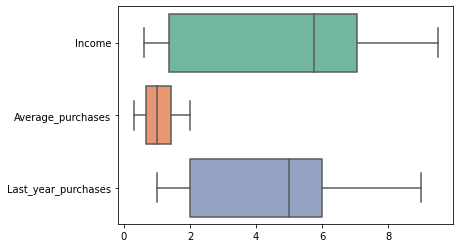

In [7]:
ax = sns.boxplot(data=df, orient='h', palette='Set2')

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
std_atr=scale.fit_transform(df)
std_atr=pd.DataFrame(std_atr,columns=df.columns)
print(std_atr)

      Income  Average_purchases  Last_year_purchases
0   0.963035           1.127453             0.139140
1  -1.325027          -0.879695            -1.451031
2   0.758134          -0.043384             0.536683
3   1.031336           0.792928             0.139140
4  -1.359177          -1.465113            -1.053488
5  -1.188426          -0.816972            -1.053488
6   1.406988           1.901041             0.139140
7  -1.495778          -1.339667            -1.451031
8  -1.427478          -0.942419            -1.053488
9   1.031336           1.022914             1.729311
10  0.211731           1.399254             1.331768
11  0.587383           0.667481             0.536683
12  0.382482          -0.733341            -0.258403
13  0.484933          -0.712433            -0.258403
14  0.245881           1.231991             1.331768
15  0.348332          -0.670617            -0.258403
16 -1.495778          -1.423298            -1.053488
17 -1.256727          -1.046958            -1.

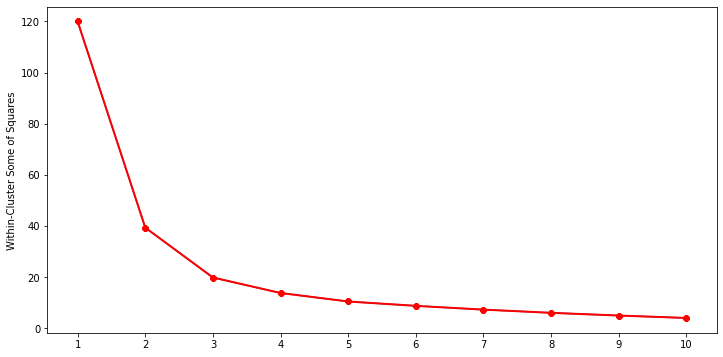

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(std_atr)
  wcss.append(km.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker='8')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Within-Cluster Some of Squares')
plt.show()


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fafd9456910>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

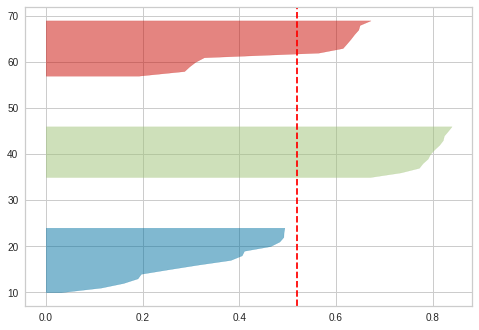

In [11]:
from yellowbrick.base import Visualizer
from yellowbrick.cluster import SilhouetteVisualizer
model=KMeans(3,random_state=42)
visualizer=SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(std_atr)

In [13]:
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=3, random_state=42)
km.fit(std_atr)
score = silhouette_score(std_atr, km.labels_)
print('Silhoutter Score: %.3f' % score)

Silhoutter Score: 0.520


For n_cluster=2, Silhouette Coef = 0.5756607240004831
For n_cluster=3, Silhouette Coef = 0.5197049948622443
For n_cluster=4, Silhouette Coef = 0.5237021282945012
For n_cluster=5, Silhouette Coef = 0.481054529942545
For n_cluster=6, Silhouette Coef = 0.5114917162228704
For n_cluster=7, Silhouette Coef = 0.49804848470105156
For n_cluster=8, Silhouette Coef = 0.50341715502284
For n_cluster=9, Silhouette Coef = 0.53685137242953
For n_cluster=10, Silhouette Coef = 0.5602100913465651
For n_cluster=11, Silhouette Coef = 0.426280743772934
For n_cluster=12, Silhouette Coef = 0.4368859763181267
For n_cluster=13, Silhouette Coef = 0.4562035826420283
For n_cluster=14, Silhouette Coef = 0.4109616164052987


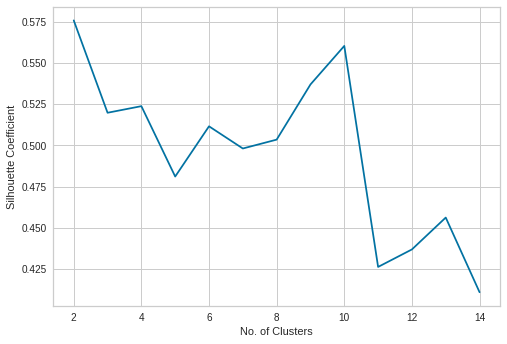

In [14]:
k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,15):
  kmeans = KMeans(n_clusters = n_cluster).fit(std_atr)
  label = kmeans.labels_
  sil_coeff = silhouette_score(std_atr, label)
  print('For n_cluster={}, Silhouette Coef = {}'.format(n_cluster,sil_coeff))
  sil_coeffecients.append(sil_coeff)
  k_clusters.append(n_cluster)

plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()


In [15]:
model=KMeans(init='random',n_clusters=3)
model.fit(std_atr)
print('inertia:', model.inertia_)
print('cluster_centroids:', model.cluster_centers_)

inertia: 19.812698382869723
cluster_centroids: [[ 0.90384157  1.05915376  0.9607285 ]
 [-1.36202323 -1.12187713 -1.25225991]
 [ 0.21435809 -0.18652161  0.04739934]]


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

preprocessor = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=2,random_state=42)),])
clusterer = Pipeline([('kmeans', KMeans(n_clusters=3, init='k-means++',n_init=50,max_iter=500, random_state=42,),),])
pipe = Pipeline([('preprocessor',preprocessor),('clusterer',clusterer)])
pipe.fit(df)

preprocessed_data = pipe['preprocessor'].transform(df)
predicted_labels=pipe['clusterer']['kmeans'].labels_

pcadf=pd.DataFrame(pipe['preprocessor'].transform(df),columns=['Dim 1', 'Dim 2'],)
pcadf['predicted_cluster']=pipe['clusterer']['kmeans'].labels_

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


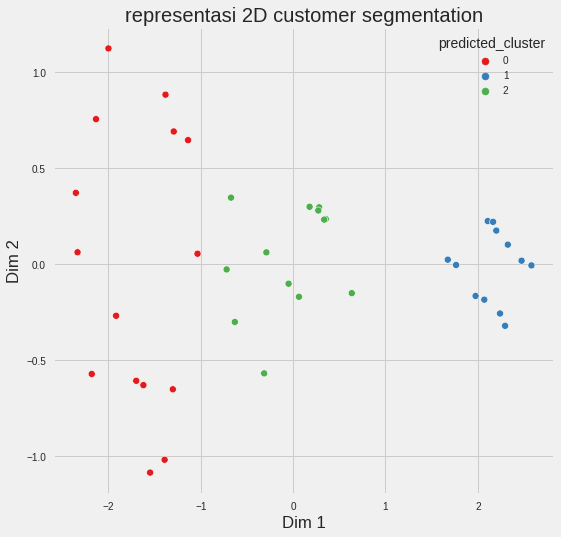

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
scat=sns.scatterplot('Dim 1', 'Dim 2', s=50, data=pcadf, hue='predicted_cluster', palette='Set1',)
scat.set_title('representasi 2D customer segmentation')
plt.show()